In [ ]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("drive/My Drive/Phishing/detect_phishing_website.csv")

In [ ]:
data.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
#Removing Unnecessary columns
data.drop(["id"], axis = 1, inplace = True)

In [ ]:
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [ ]:
data.shape

(11055, 31)

In [ ]:
#Checking Data can contain null values
data.isnull().values.any()

False

In [ ]:
data.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [ ]:
#Removing Null values
data=data.dropna()

In [ ]:
#Define X && Y
y=data.Result
y.shape

(11055,)

In [ ]:
x=data.drop('Result',axis=1)
x.shape

(11055, 30)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8844, 30)
(8844,)
(2211, 30)
(2211,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
lr=LogisticRegression(random_state = 0)

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
#Predicting the result for test data
y_predict=lr.predict(x_test)

In [ ]:
print("Train Accuracy : ",100*lr.score(x_train,y_train))
print("Test Accuracy : ",100*lr.score(x_test,y_test))
print(metrics.classification_report(y_test,y_predict))

Train Accuracy :  92.85391225689733
Test Accuracy :  92.85391225689733
              precision    recall  f1-score   support

          -1       0.95      0.90      0.92      1026
           1       0.92      0.96      0.93      1185

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
rb=GradientBoostingClassifier()

In [ ]:
rb.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
#Predicting the result for test data
y_predict=rb.predict(x_test)

In [ ]:
print("Train Accuracy : ",100*rb.score(x_train,y_train))
print("Test Accuracy : ",100*rb.score(x_test,y_test))
print(metrics.classification_report(y_test,y_predict))

Train Accuracy :  95.25101763907735
Test Accuracy :  94.9796472184532
              precision    recall  f1-score   support

          -1       0.96      0.93      0.95      1026
           1       0.94      0.96      0.95      1185

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier(random_state=0)

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
#Predicting the result for test data
y_predict=dt.predict(x_test)

In [ ]:
print("Train Accuracy : ",100*dt.score(x_train,y_train))
print("Test Accuracy : ",100*dt.score(x_test,y_test))
print(metrics.classification_report(y_test,y_predict))

Train Accuracy :  99.00497512437812
Test Accuracy :  96.11035730438715
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96      1026
           1       0.95      0.97      0.96      1185

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adc=AdaBoostClassifier()

In [ ]:
adc.fit(x_train,y_train)

AdaBoostClassifier()

In [ ]:
#Predicting the result for test data
y_predict=dt.predict(x_test)

In [ ]:
print("Train Accuracy : ",100*adc.score(x_train,y_train))
print("Test Accuracy : ",100*adc.score(x_test,y_test))
print(metrics.classification_report(y_test,y_predict))

Train Accuracy :  93.79240162822252
Test Accuracy :  93.7584803256445
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96      1026
           1       0.95      0.97      0.96      1185

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [ ]:
models=[lr,rb,dt,adc]
a=["Logistic Regression","Regular Boosting","Decision Tree","AdaBoost Classifire"]
names=["LR","RB","DT","ADC"]

In [ ]:
test=[]
train=[]
for model in models:
    model.fit(x_train,y_train)
    train.append(model.score(x_train,y_train))
    test.append(model.score(x_test,y_test))

In [ ]:
results = pd.DataFrame({ 'ML Model': a,    
    'Train Accuracy': train,
    'Test Accuracy': test})

In [ ]:
results

,ML Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.928539,0.928539
1,Regular Boosting,0.952510,0.949796
2,Decision Tree,0.990050,0.961104
3,AdaBoost Classifire,0.937924,0.937585


In [ ]:
results.sort_values(by=['Train Accuracy','Test Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,Decision Tree,0.990050,0.961104
1,Regular Boosting,0.952510,0.949796
3,AdaBoost Classifire,0.937924,0.937585
0,Logistic Regression,0.928539,0.928539


In [ ]:
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,Decision Tree,0.990050,0.961104
1,Regular Boosting,0.952510,0.949796
3,AdaBoost Classifire,0.937924,0.937585
0,Logistic Regression,0.928539,0.928539


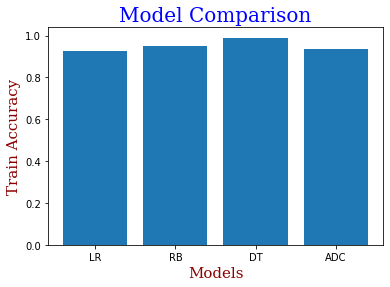

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.xlabel('Models',fontdict = font2)
plt.ylabel('Train Accuracy',fontdict = font2)
plt.title('Model Comparison',fontdict = font1)
plt.bar(names,train)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier
from numpy import mean
from numpy import std


In [ ]:
# get a stacking ensemble of models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('dt', DecisionTreeClassifier()))
level0.append(('adc', AdaBoostClassifier()))
level0.append(('rb', GradientBoostingClassifier()))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [ ]:
# get a list of models to evaluate
models = dict()
models['Logistic'] = LogisticRegression()
models['Decision'] = DecisionTreeClassifier()
models['AdaBoost'] = AdaBoostClassifier()
models['Regular'] = GradientBoostingClassifier()
models['Stacking'] = model

In [ ]:
# evaluate a give model using cross-validation
def evaluate_model(model, x_train, y_train):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

In [ ]:
# evaluate the models and store results
result, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, x_train, y_train)
 result.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>Logistic 0.927 (0.007)
>Decision 0.962 (0.006)
